In [1]:
%matplotlib inline

import math

import numpy as np
import matplotlib.pyplot as plt

from openbb_terminal.sdk import openbb

In [5]:
# These are all Python lists. windows defines the number of days I want to use to compute volatility. 
# The Quantiles defines the percentage of the top and bottom 25% of values. 
# The last few lists are where we accumulate data to plot.
windows = [30, 60, 90, 120]
quantiles = [0.25, 0.75]

max_ = []
min_ = []
top_q = []
median = []
bottom_q = []
realized = []


In [2]:
data = openbb.stocks.load("JPM", start_date = "2020-01-01", end_date = "2020-12-31")


Loading Daily data for JPM with starting period 2020-01-02.

In [9]:
# Realized volatility is a measurement of how much the price or returns of stock vary. 
# It’s used to optimize portfolios, detect regime changes, and price derivatives. 
# The most common way to measure realized volatility is the standard deviation. 
def realized_vol(price_data, window = 30):

    log_return = (price_data["Close"] / price_data["Close"].shift(1)).apply(np.log)
    return log_return.rolling(window = window, center = False).std() * math.sqrt(252)

In [10]:
# The next step is to loop through each of the windows and 
# compute realized volatility over each time frame. 
# estimator is a pandas DataFrame. 
# it’s makes computing the min, max, median, and quantilese easy.
for window in windows:
    estimator = realized_vol(window = window, price_data = data)

    max_.append(estimator.max())
    top_q.append(estimator.quantile(quantiles[1]))
    median.append(estimator.median())
    bottom_q.append(estimator.quantile(quantiles[0]))
    min_.append(estimator.min())
    realized.append(estimator[-1])

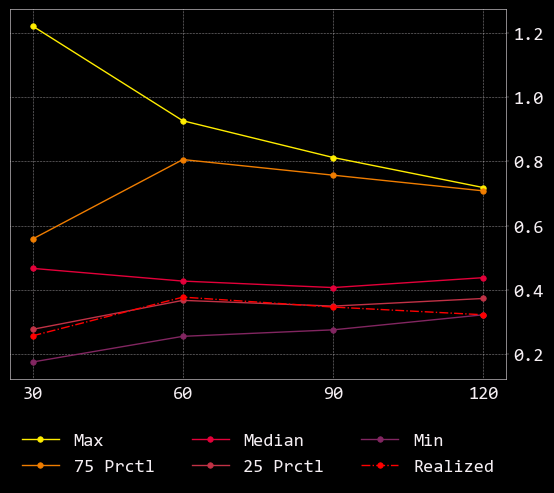

In [13]:
# Plots the volatility Cone
plt.plot(windows, max_, "-o", linewidth = 1, label = "Max")
plt.plot(windows, top_q, "-o", linewidth = 1, label = f"{quantiles[1] * 100:.0f} Prctl")
plt.plot(windows, median, "-o", linewidth = 1, label = "Median")
plt.plot(windows, bottom_q, "-o", linewidth = 1, label = f"{quantiles[0] * 100:.0f} Prctl")
plt.plot(windows, min_, "-o", linewidth = 1, label = "Min")

plt.plot(windows, realized, "ro-.", linewidth = 1, label = "Realized")

# Set  the x-axis Labels
plt.xticks(windows)

# format the Legend
plt.legend(loc= "upper center", bbox_to_anchor = (0.5, -0.1), ncol = 3)

<Axes: xlabel='date'>

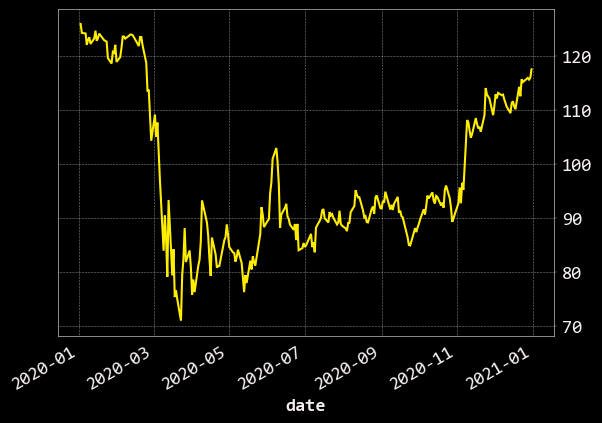

In [15]:
data.Close.plot()

In [ ]:
# The y-axis is the realized volatility over each time frame. The x-axis is time frame we use to compute the realized volatility.

# There are three conclusions you can draw from this chart:

#    Over the 30-day window, there is a spike in realized volatility. 
#    Realized volatility spikes usually correspond to a drop in the stock price. 
#    This should tell us to explore the stock price to see what happened.
#    Realized volatility (the dashed line) is close to the lowest it’s been across all time frames. 
#    This is a data point to support a case to get long volatility (i.e. options are cheap).
#    Realized volatility is mean reverting. 
#    You can see this in the cone shape of the chart. 
#    This is a data point to support a case to get long volatility.
